# Task 1: Data Analysis (Train)

1- Analyze the dataset for the distribution of the labels by:
- a) Counting the number of images per label,
- b) Mean and variance for the pixel ratio per label: 
  - b1) (# of pixels of label j in image i) / (# of pixels in image i),
  - b2) (# of pixels of label j in image i) / (# of foreground pixels in image i) ====> in this case we exclude the background

## Load Modules and Import Data

In [21]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pandas as pd
from time import time
import pylab
import os
from collections import Counter
from tqdm import tqdm
import cv2
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

# Constants and configuration settings can be imported
from src import config

if "notebooks" in os.getcwd():
    print("Running in Jupyter Notebook")

# The analysis will be performed on Train dataset (check src.config)
dataDir='datasets/fashion/'
dataType='train2020'
annFile='{}/annotations/instances_attributes_{}.json'.format(dataDir,dataType)
maskFolder='{}/annotations/{}/'.format(dataDir,dataType)
imgFolder='{}/images/{}/'.format(dataDir,dataType)

annFile='{}/annotations/instances_attributes_{}.json'.format(dataDir,dataType) # Annotations json
maskFolder='{}/annotations/{}/'.format(dataDir, dataType)                      # Mask images
imgFolder='{}/images/{}/'.format(dataDir,dataType)

# Read data from train dataset
coco=COCO(annFile)
# arr_means = np.empty(3)
# arr_stds = np.empty(3)
# arr_sizes = np.empty(3)
# ids = coco.getImgIds()

# for img_id in tqdm(ids):
#     img = coco.loadImgs(img_id)[0]
#     img_path = imgFolder + img['file_name']
#     image = cv2.imread(img_path)
#     # Convert to color if grayscale
#     if len(image.shape) == 2:
#         image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
#     assert len(image.shape) == 3, f"Image shape is {image.shape}"
    
#     # Concatenate the arrays with the means, stds and sizes
#     arr_means = np.concatenate((arr_means, np.mean(image, axis=(0,1))))
#     arr_stds = np.concatenate((arr_stds, np.std(image, axis=(0,1))))
#     arr_sizes = np.concatenate((arr_sizes, image.shape[:2]))

# arr_means = arr_means.reshape(-1, 3)
# arr_stds = arr_stds.reshape(-1, 3)
# arr_sizes = arr_sizes[1:].reshape(-1, 2)

# # Save them to a file
# np.save('aux_data/means.npy', arr_means)
# np.save('aux_data/stds.npy', arr_stds)
# np.save('aux_data/sizes.npy', arr_sizes)

# Load the data
arr_means = np.load('aux_data/means.npy')
arr_stds = np.load('aux_data/stds.npy')
arr_sizes = np.load('aux_data/sizes.npy')

df_means = pd.DataFrame(arr_means, columns=['B', 'G', 'R'])
df_stds = pd.DataFrame(arr_stds, columns=['B', 'G', 'R'])
df_sizes = pd.DataFrame(arr_sizes, columns=['Height', 'Width'])


loading annotations into memory...
Done (t=4.49s)
creating index...
index created!


(-0.5, 632.5, 1023.5, -0.5)

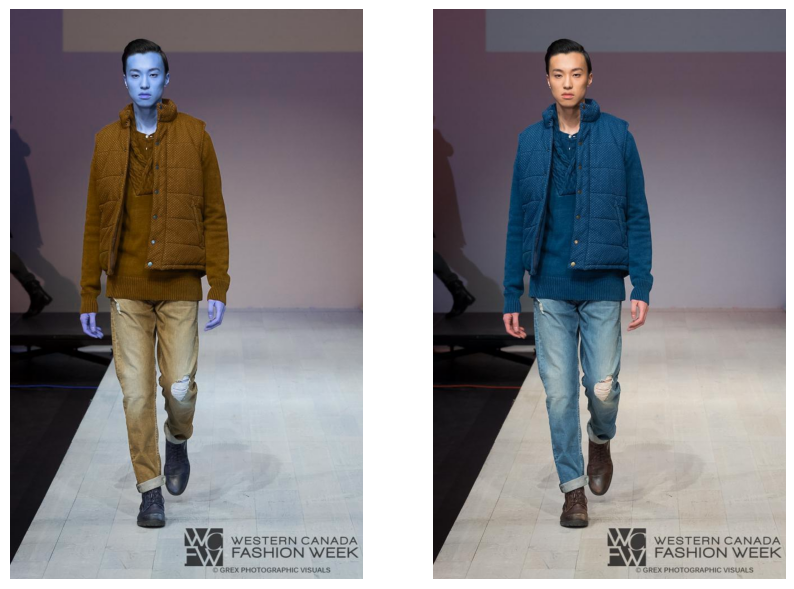

In [22]:
# load one image and decompose it in colors
imgIds = coco.getImgIds()
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img_path = imgFolder + img['file_name']
# COnvert to rgb if grb or bgr and show
image = cv2.imread(img_path)
# im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
im_rgb = image[:, :, ::-1]

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[1].imshow(im_rgb)
ax[0].axis('off')

ax[0].imshow(image)
ax[1].axis('off')

/tmp/ipykernel_46316/31521745.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(df_sizes, ax=ax[1], palette=['b', 'g', 'r'], alpha=0.5)


Text(0.5, 0.98, 'Distributions of standard deviations of RGB channels')

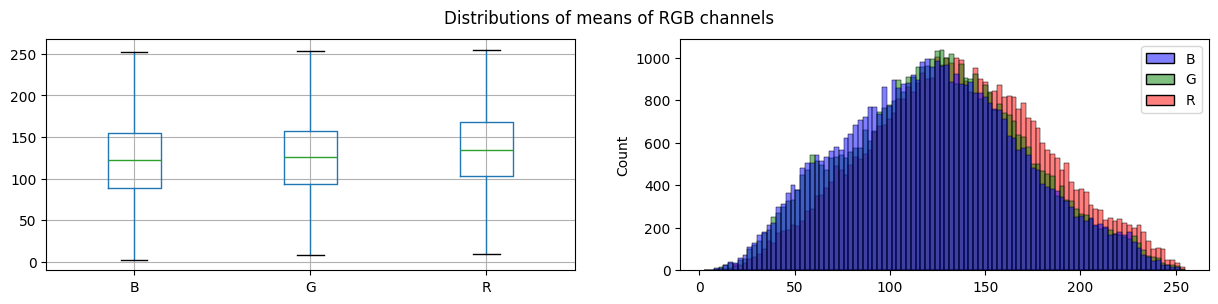

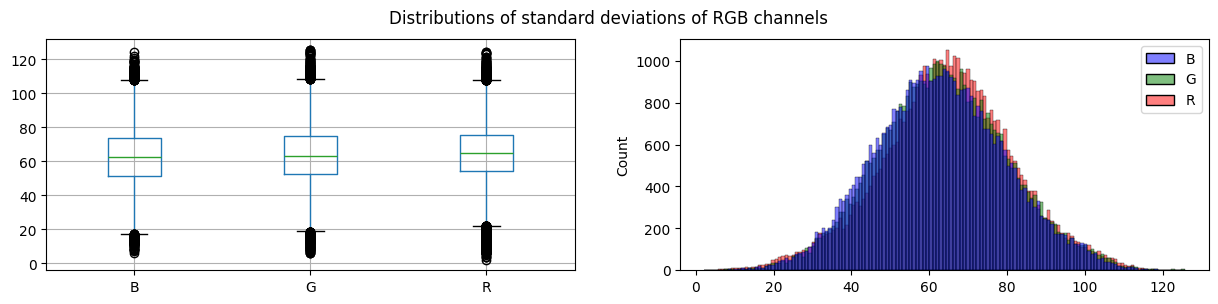

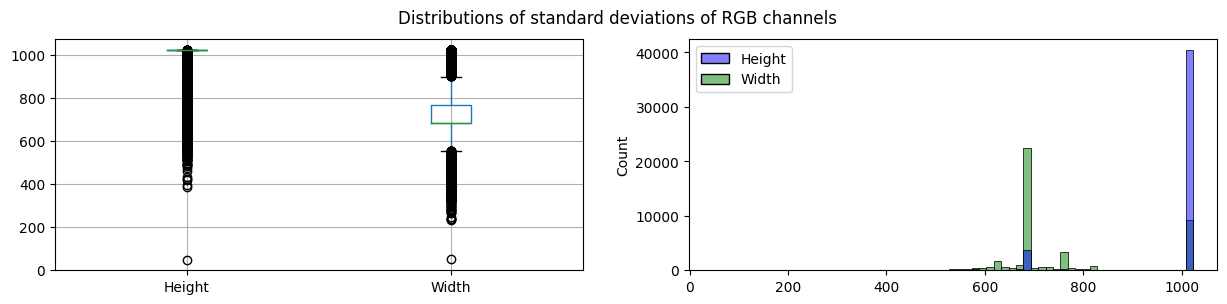

In [24]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
df_means.boxplot(ax=ax[0])
sns.histplot(df_means, ax=ax[1], palette=['b', 'g', 'r'])
plt.suptitle('Distributions of means of RGB channels')

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
df_stds.boxplot(ax=ax[0])
sns.histplot(df_stds, ax=ax[1], palette=['b', 'g', 'r'])
plt.suptitle('Distributions of standard deviations of RGB channels')

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
df_sizes.boxplot(ax=ax[0])
sns.histplot(df_sizes, ax=ax[1], palette=['b', 'g', 'r'], alpha=0.5)
plt.suptitle('Distributions of standard deviations of RGB channels')

In [30]:
np.mean(arr_means, axis=0)[::-1], np.median(arr_means, axis=0)[::-1]

(array([135.43535295, 125.5206132 , 122.8418554 ]),
 array([134.8085516 , 125.56540973, 122.1809356 ]))

In [31]:
np.mean(arr_stds, axis=0)[::-1], np.median(arr_stds, axis=0)[::-1]

(array([64.70508792, 63.73913779, 62.8355091 ]),
 array([64.8588287 , 63.36985677, 62.51208382]))

In [200]:
arr_sizes_resh = arr_sizes[1:].reshape(-1, 2)
print(np.mean(arr_sizes_resh, axis=0), np.median(arr_sizes_resh, axis=0))
df_pairs = pd.DataFrame(arr_sizes_resh, columns=['height', 'width'])
df_pairs.value_counts(normalize=True).head(20)

[986.49297098 755.23250766] [1024.  682.]


height  width 
1024.0  682.0     0.275009
        683.0     0.107728
        1024.0    0.084999
        681.0     0.053853
        768.0     0.048790
682.0   1024.0    0.043639
1024.0  680.0     0.031475
683.0   1024.0    0.018126
1024.0  767.0     0.018061
        632.0     0.015715
680.0   1024.0    0.013546
1024.0  819.0     0.012669
        633.0     0.011814
        678.0     0.008460
        679.0     0.007080
        731.0     0.006970
        684.0     0.006181
768.0   1024.0    0.005765
1024.0  722.0     0.004866
        685.0     0.004296
Name: proportion, dtype: float64

Most of the images are 1024x682(3) or 680(2,3)x1024. This can be important to understand how much information 
is lost when resizing the images to 256x256.

In [196]:
# Read 20 random images and get their sizes
# np.random.seed(42)
ids = coco.getImgIds()
np.random.shuffle(ids)
for img_id in ids[:20]:
    img = coco.loadImgs(img_id)[0]
    img_path = imgFolder + img['file_name']
    image = cv2.imread(img_path)
    print(f"Image shape: {image.shape}")

Image shape: (1024, 682, 3)
Image shape: (768, 1024, 3)
Image shape: (1024, 682, 3)
Image shape: (1024, 1024, 3)
Image shape: (1024, 517, 3)
Image shape: (682, 1024, 3)
Image shape: (1024, 683, 3)
Image shape: (1024, 668, 3)
Image shape: (1024, 682, 3)
Image shape: (1024, 681, 3)
Image shape: (1024, 681, 3)
Image shape: (1024, 576, 3)
Image shape: (1024, 1024, 3)
Image shape: (685, 1024, 3)
Image shape: (1024, 677, 3)
Image shape: (1024, 682, 3)
Image shape: (1024, 683, 3)
Image shape: (1024, 683, 3)
Image shape: (1024, 683, 3)
Image shape: (1024, 682, 3)
